# Simulation de modèles de Vol

In [26]:
import numpy as np
import pandas as pd 
import yfinance as yf
from arch import arch_model
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Modèle MA(1)

In [2]:
# --- 1. Simulation d'un MA(1) ---
def simulate_ma1(beta, n=200):
    eps = np.random.normal(0, 1, n+1)  # +1 pour avoir eps_{t-1}
    y = eps[1:] + beta * eps[:-1]
    return y

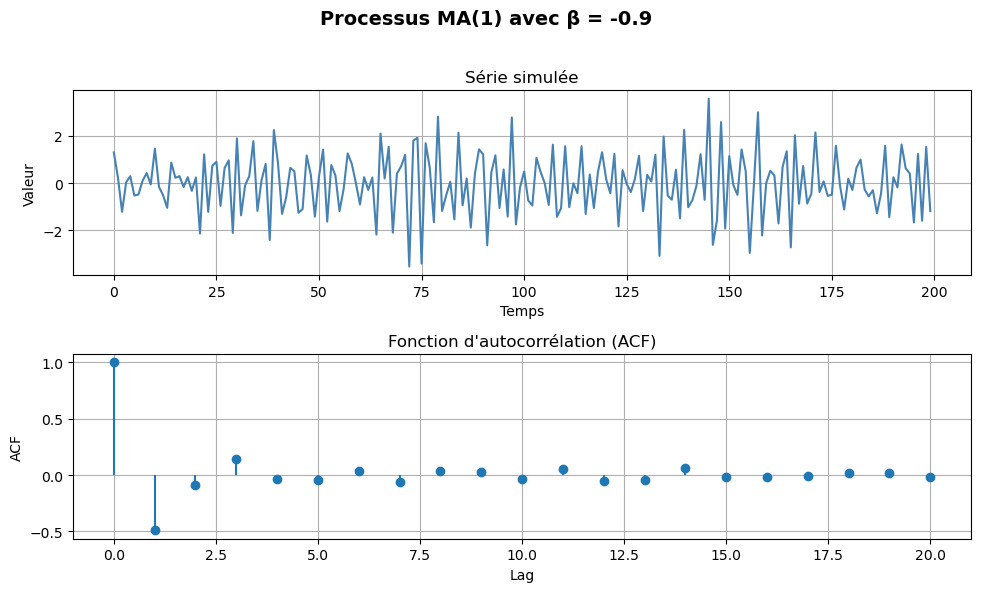

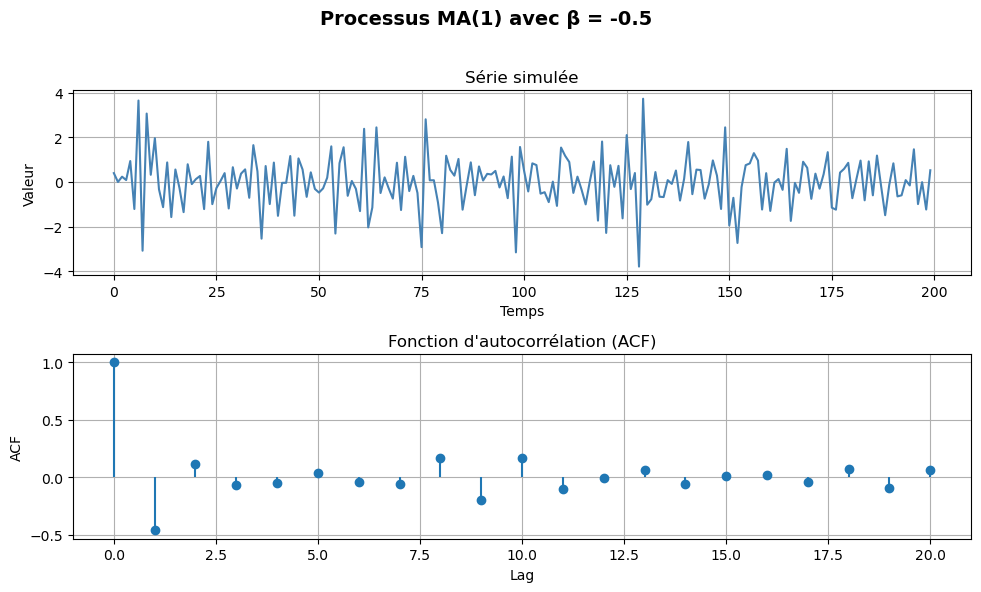

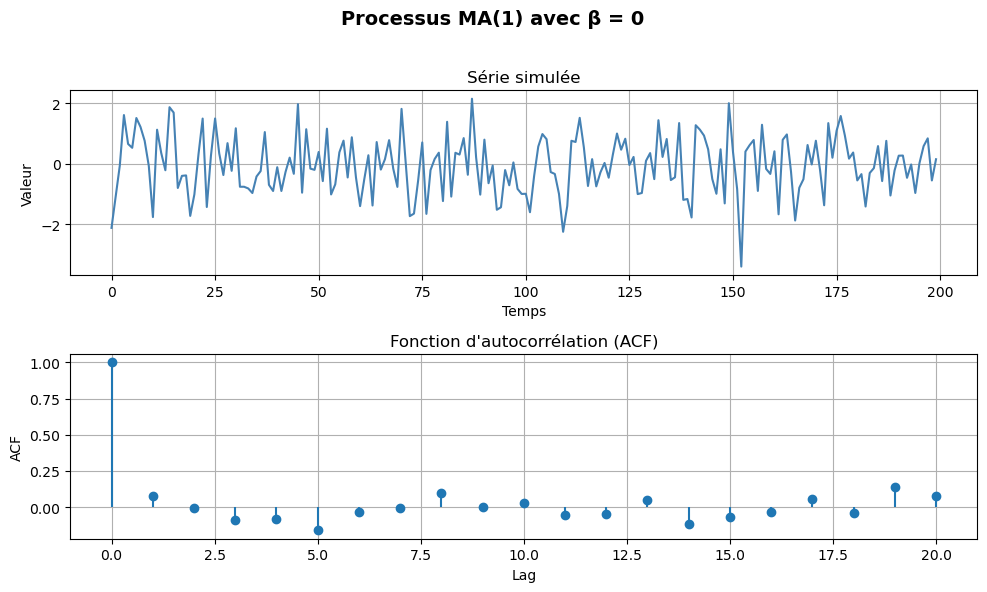

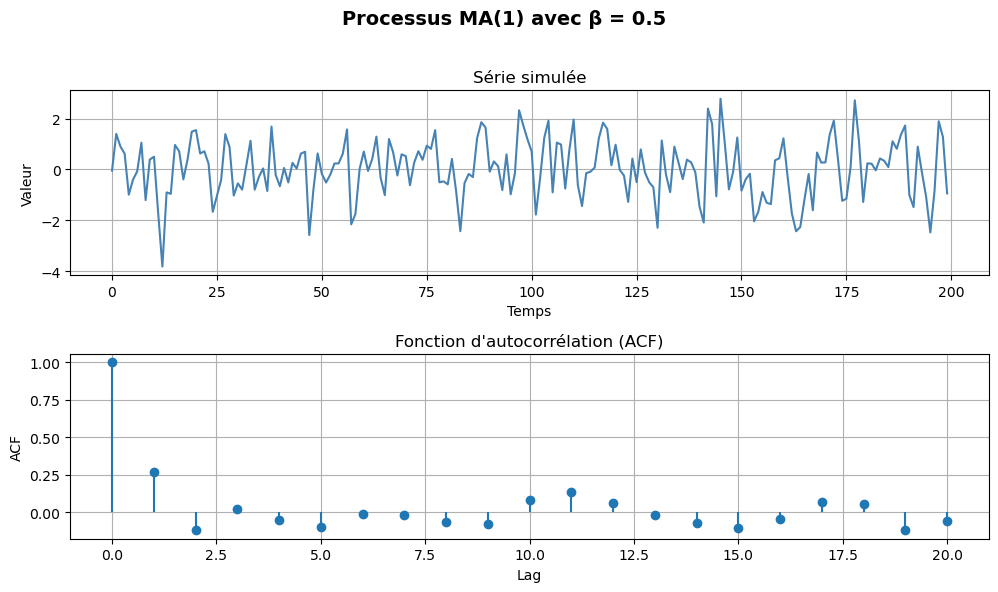

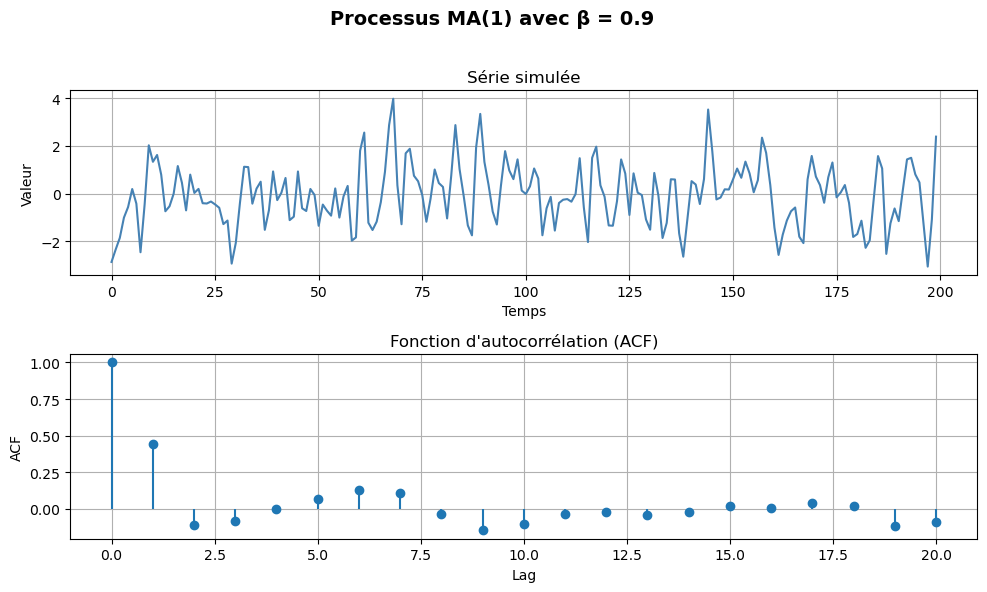

In [3]:
# --- 2. Paramètres à tester ---
betas = [-0.9, -0.5, 0, 0.5, 0.9]
n = 200
lags = 20

for beta in betas:
    y = simulate_ma1(beta, n)
    acf_vals = acf(y, nlags=lags, fft=True)
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    fig.suptitle(f"Processus MA(1) avec β = {beta}", fontsize=14, fontweight='bold')
    
    # --- Série temporelle ---
    axs[0].plot(y, color='steelblue')
    axs[0].set_title("Série simulée")
    axs[0].set_xlabel("Temps")
    axs[0].set_ylabel("Valeur")
    axs[0].grid(True)
    
    # --- ACF ---
    axs[1].stem(range(lags+1), acf_vals, basefmt=" ")
    axs[1].set_title("Fonction d'autocorrélation (ACF)")
    axs[1].set_xlabel("Lag")
    axs[1].set_ylabel("ACF")
    axs[1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Modèle AR(1)

In [4]:
def simulate_ar1(alpha, n=200):
    y = np.zeros(n)
    eps = np.random.normal(0, 1, n)
    for t in range(1, n):
        y[t] = alpha * y[t-1] + eps[t]
    return y

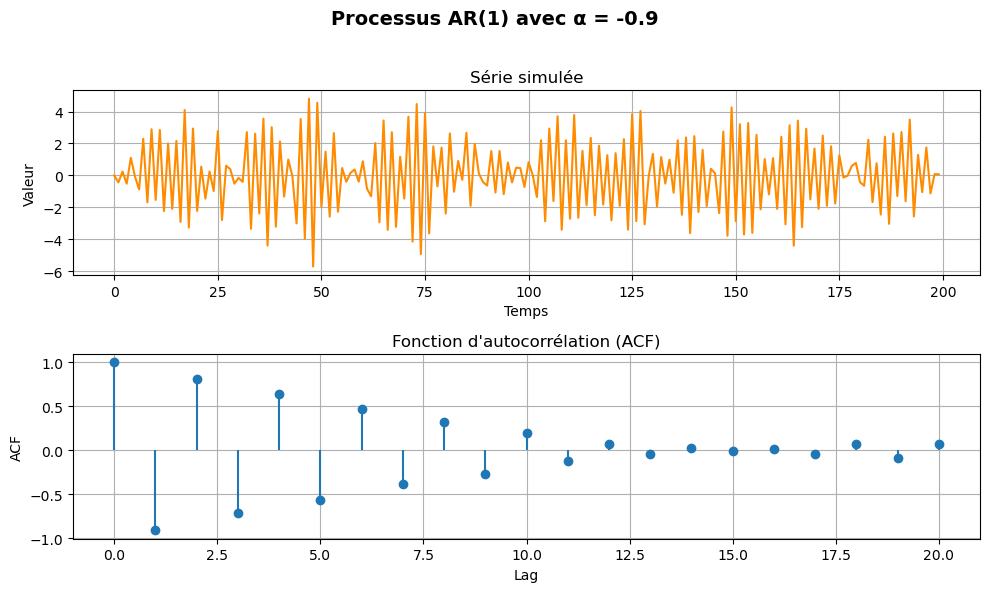

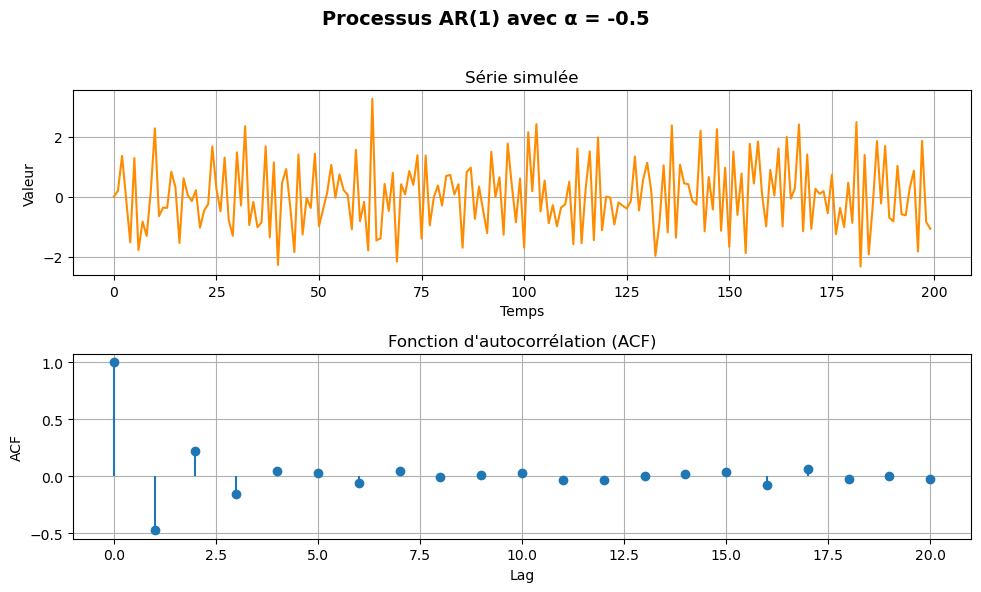

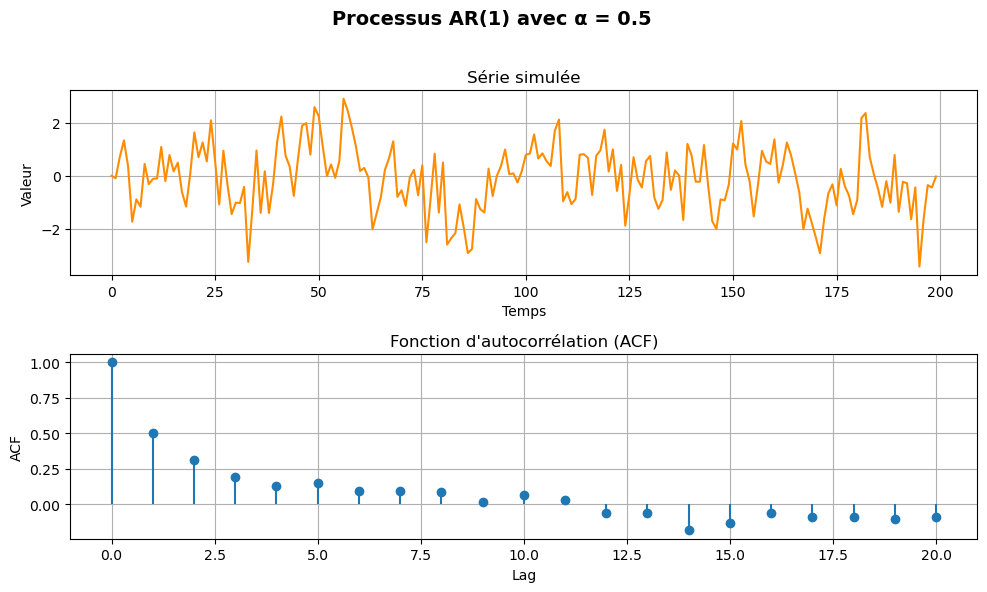

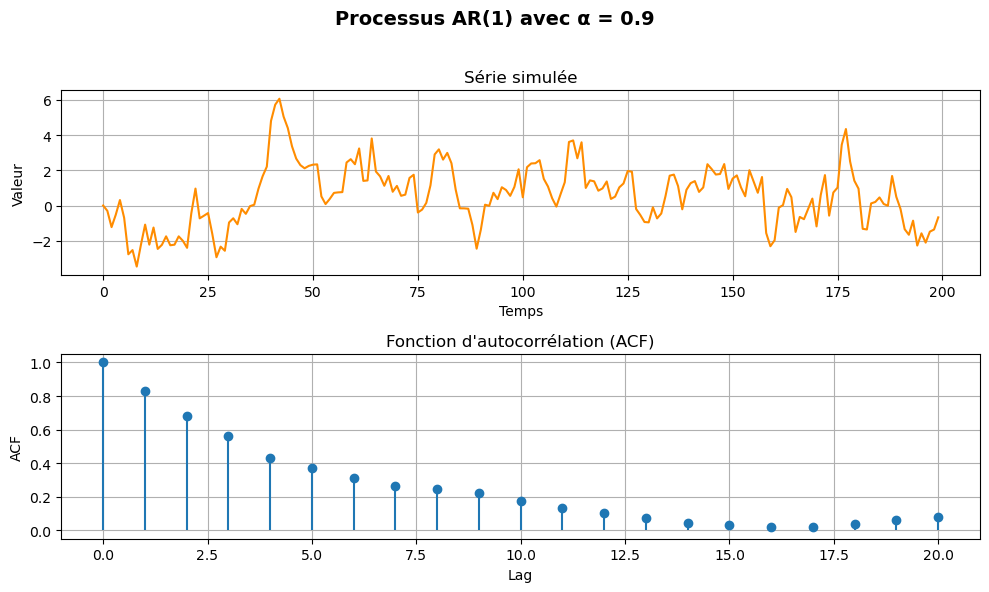

In [5]:
alphas = [-0.9, -0.5, 0.5, 0.9]
n = 200
lags = 20

# --- Simulation et affichage ---
for alpha in alphas:
    y = simulate_ar1(alpha, n)
    acf_vals = acf(y, nlags=lags, fft=True)
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    fig.suptitle(f"Processus AR(1) avec α = {alpha}", fontsize=14, fontweight='bold')
    
    # --- Série temporelle ---
    axs[0].plot(y, color='darkorange')
    axs[0].set_title("Série simulée")
    axs[0].set_xlabel("Temps")
    axs[0].set_ylabel("Valeur")
    axs[0].grid(True)
    
    # --- ACF ---
    axs[1].stem(range(lags+1), acf_vals, basefmt=" ")
    axs[1].set_title("Fonction d'autocorrélation (ACF)")
    axs[1].set_xlabel("Lag")
    axs[1].set_ylabel("ACF")
    axs[1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## ARMA(1,1) model

In [6]:
def simulate_arma11(alpha, beta, n=200):
    eps = np.random.normal(0, 1, n+1)  # +1 for eps_{t-1}
    y = np.zeros(n)
    for t in range(n):
        y[t] = alpha * (y[t-1] if t > 0 else 0) + eps[t+1] + beta * eps[t]
    return y

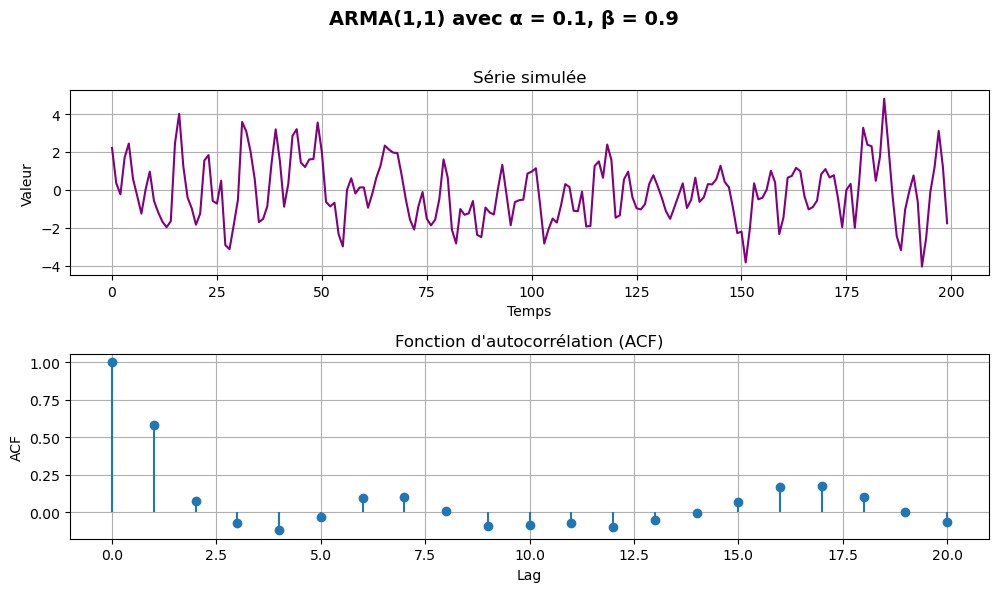

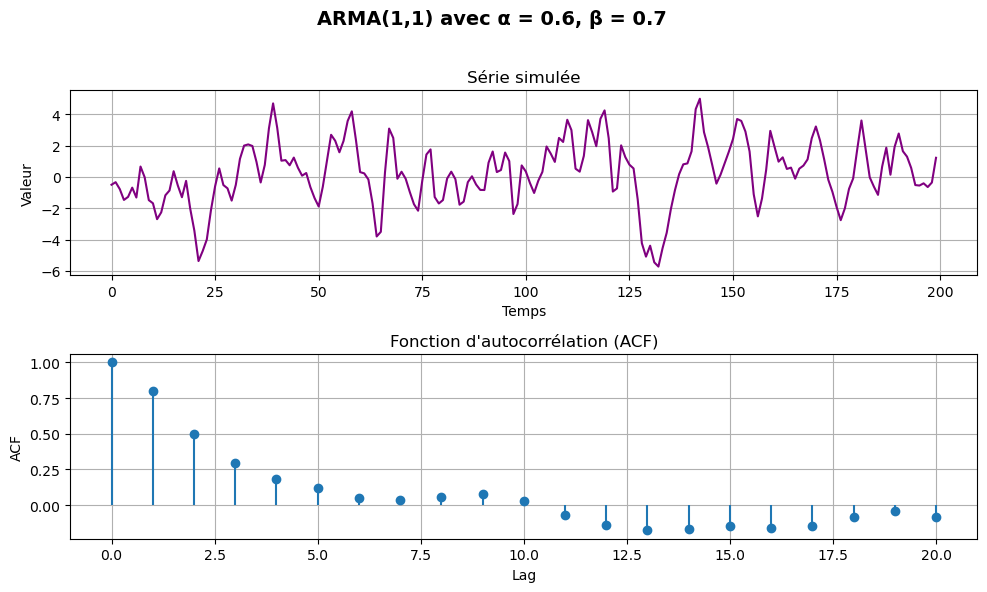

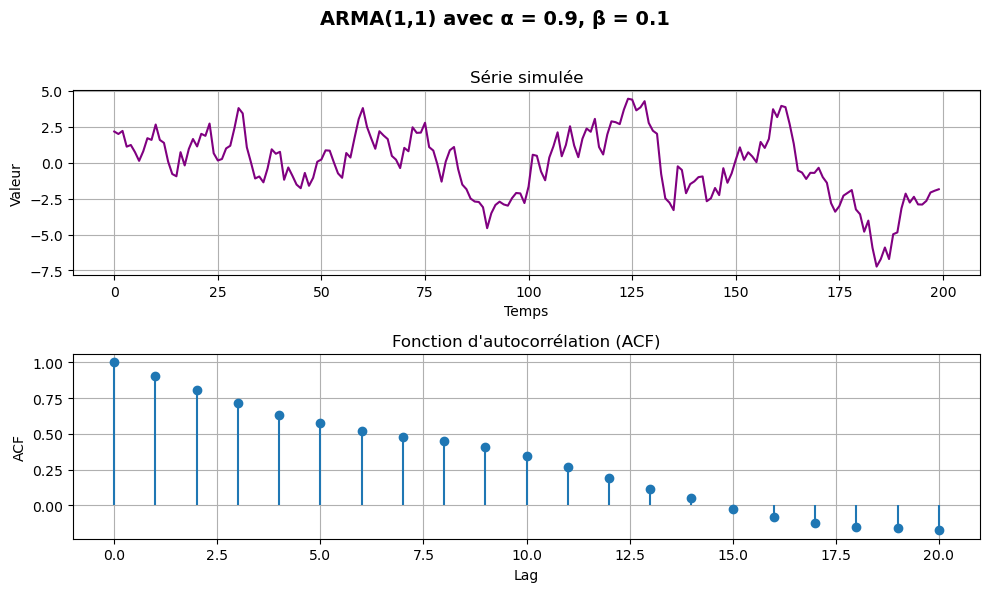

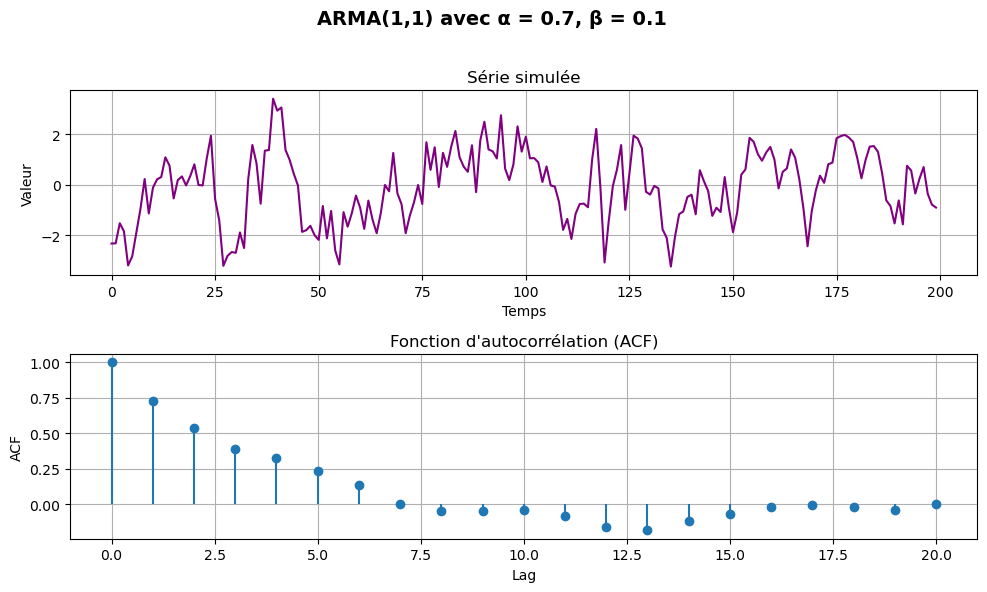

In [7]:
params = [(0.1, 0.9), (0.6, 0.7), (0.9, 0.1), (0.7, 0.1)]
n = 200
lags = 20

# --- Simulation and plotting ---
for alpha, beta in params:
    y = simulate_arma11(alpha, beta, n)
    acf_vals = acf(y, nlags=lags, fft=True)
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    fig.suptitle(f"ARMA(1,1) avec α = {alpha}, β = {beta}", fontsize=14, fontweight='bold')
    
    # --- Time series ---
    axs[0].plot(y, color='purple')
    axs[0].set_title("Série simulée")
    axs[0].set_xlabel("Temps")
    axs[0].set_ylabel("Valeur")
    axs[0].grid(True)
    
    # --- ACF ---
    axs[1].stem(range(lags+1), acf_vals, basefmt=" ")
    axs[1].set_title("Fonction d'autocorrélation (ACF)")
    axs[1].set_xlabel("Lag")
    axs[1].set_ylabel("ACF")
    axs[1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Log Returns of the CAC 40

In [8]:
data = yf.download('^FCHI', start='2010-01-01', end='2025-01-01')

# Calculer les rendements log
data['log_returns'] = np.log(data.Close / data.Close.shift(1))

# Supprimer les valeurs manquantes
log_returns = data['log_returns'].dropna()

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_2030/467851343.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^FCHI', start='2010-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


<Axes: >

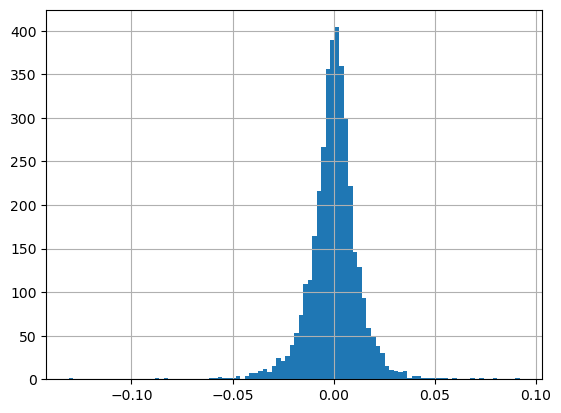

In [9]:
log_returns.hist(bins=100)

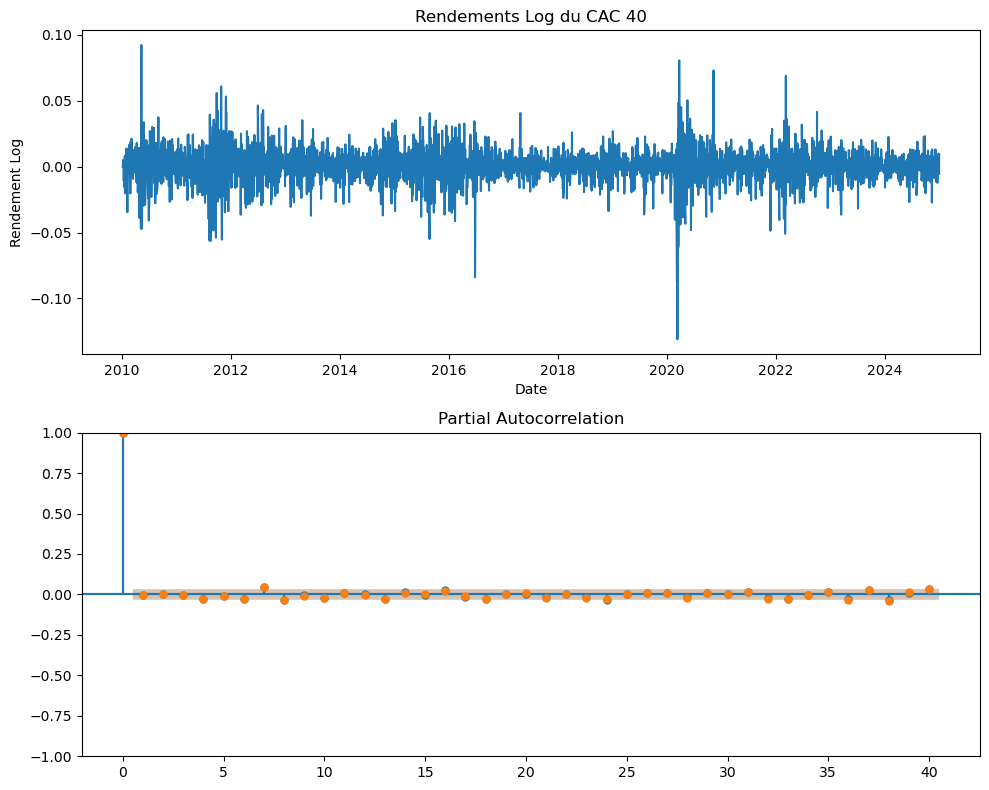

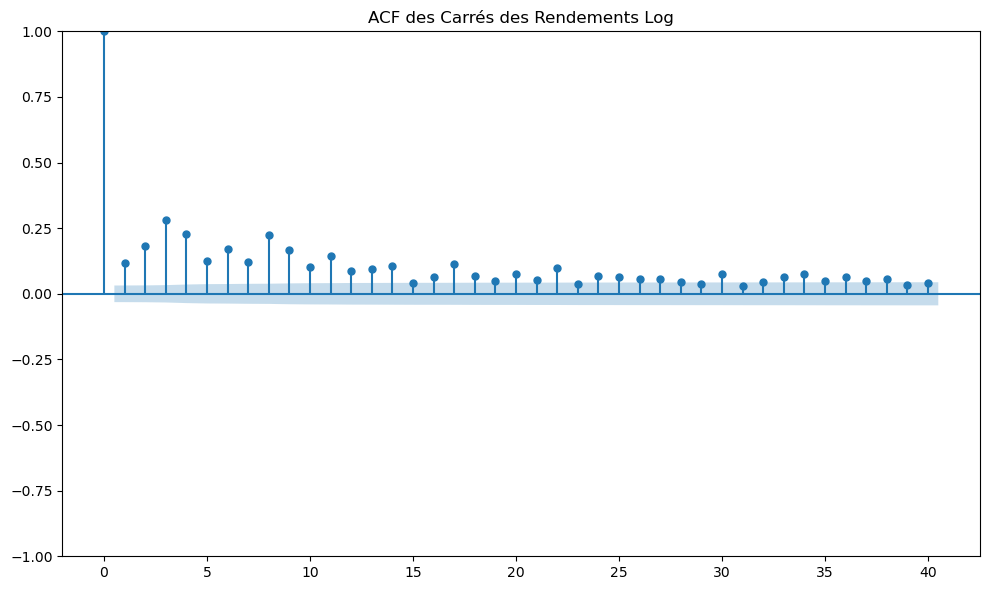

In [10]:

# Calculer l'ACF et la PACF des rendements log
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(log_returns)
axes[0].set_title('Rendements Log du CAC 40')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Rendement Log')
plot_acf(log_returns, ax=axes[1], lags=40)
plot_pacf(log_returns, ax=axes[1], lags=40)
plt.tight_layout()
plt.show()

# Calculer l'ACF des carrés des rendements log
log_returns_squared = log_returns ** 2
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(log_returns_squared, ax=ax, lags=40)
ax.set_title('ACF des Carrés des Rendements Log')
plt.tight_layout()
plt.show()

## ARCH(1,1) Model

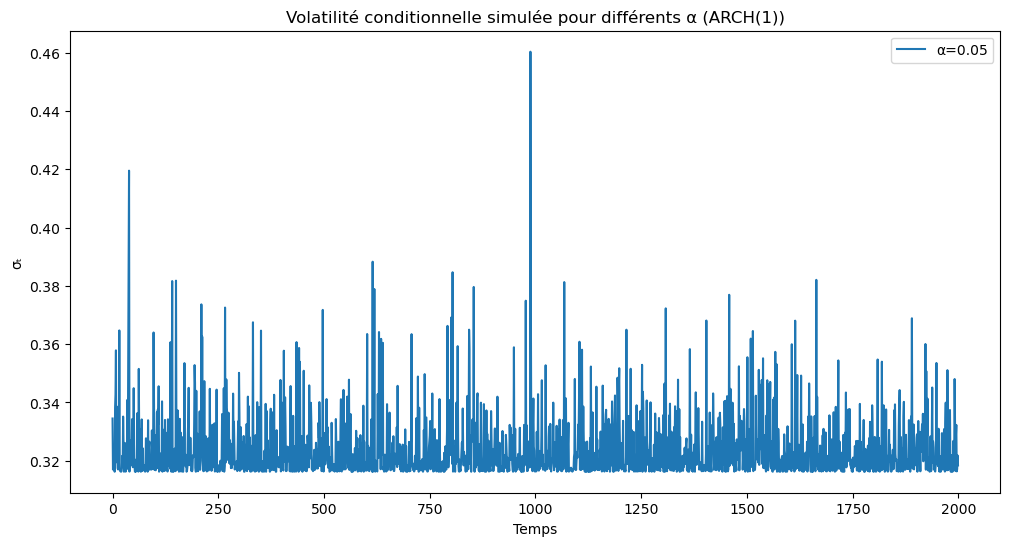

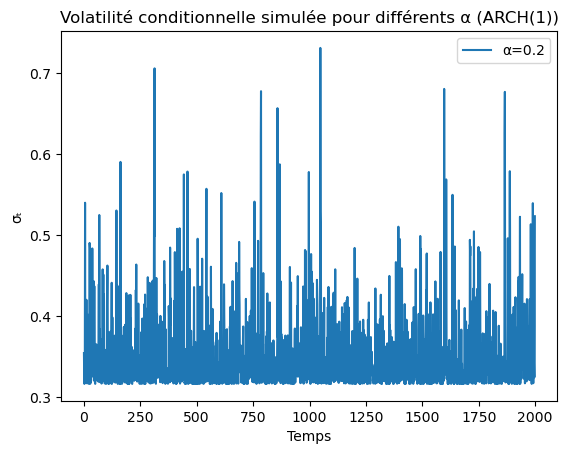

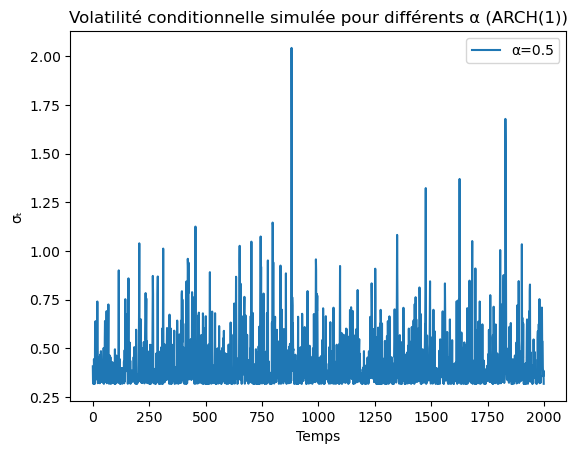

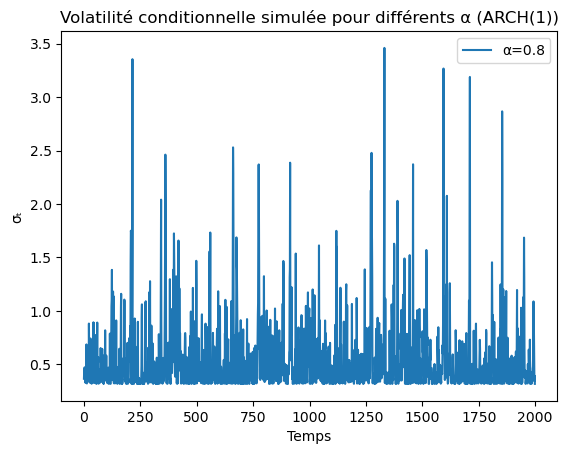

In [12]:
# --- Simulation ARCH(1) ---
def simulate_arch1(omega, alpha, n=1000, burn=200):
    eps = np.random.normal(0, 1, n + burn)
    sigma2 = np.zeros(n + burn)
    r = np.zeros(n + burn)
    sigma2[0] = omega / (1 - alpha)  # variance inconditionnelle
    for t in range(1, n + burn):
        sigma2[t] = omega + alpha * r[t-1]**2
        r[t] = np.sqrt(sigma2[t]) * eps[t]
    return r[burn:], np.sqrt(sigma2[burn:])

# --- Paramètres ---
omega = 0.1
alphas = [0.05, 0.2, 0.5, 0.8]
n = 2000

# --- Simulation & Plot ---
plt.figure(figsize=(12,6))
for alpha in alphas:
    r, sigma = simulate_arch1(omega, alpha, n)
    plt.plot(sigma, label=f'α={alpha}')
    plt.title("Volatilité conditionnelle simulée pour différents α (ARCH(1))")
    plt.xlabel("Temps")
    plt.ylabel("σₜ")
    plt.legend()
    plt.show()


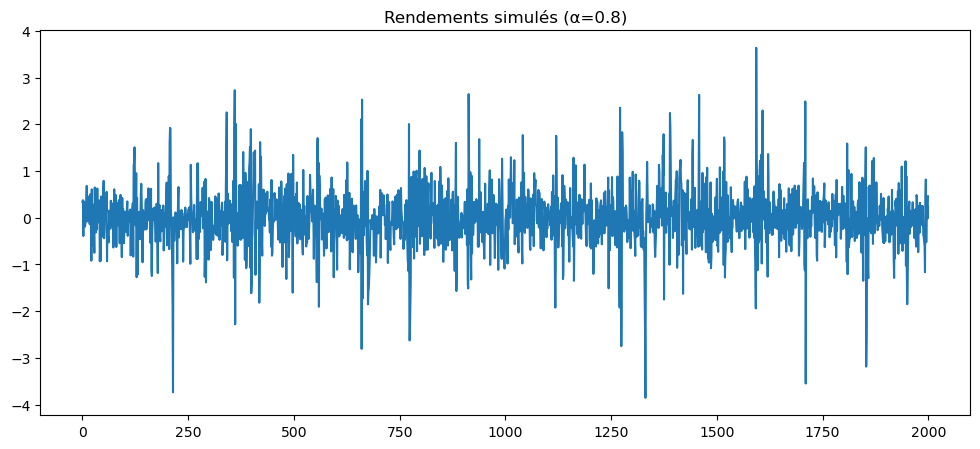

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(r)
plt.title(f"Rendements simulés (α={alpha})")
plt.show()

## GARCH(1,1)

In [21]:
####################################
# 1) Simulate a returns time series
####################################
def simulate_garch11(omega, alpha, beta, n, burn=500):
    total = n + burn
    eps = np.random.normal(size=total)
    sigma2 = np.zeros(total)
    r = np.zeros(total)
    sigma2[0] = omega / (1 - alpha - beta) if alpha + beta < 1 else omega
    r[0] = np.sqrt(sigma2[0]) * eps[0]
    for t in range(1, total):
        sigma2[t] = omega + alpha * r[t-1]**2 + beta * sigma2[t-1]
        r[t] = np.sqrt(sigma2[t]) * eps[t]
    return pd.Series(r[burn:], name="returns")

In [22]:
# True DGP (you can change these)
omega_true = 0.01
alpha_true = 0.10
beta_true  = 0.85
n = 3000

returns = simulate_garch11(omega_true, alpha_true, beta_true, n)

In [23]:
########################################################
# 2) Automatic model selection (grid search over p,q)
#    using AIC and BIC (fit with normal distribution)
########################################################
max_p = 3
max_q = 3
results = []

for p in range(1, max_p+1):
    for q in range(0, max_q+1):           # allow q=0 (pure ARCH) up to max_q
        try:
            am = arch_model(returns, vol='GARCH', p=p, q=q, mean='Constant', dist='normal')
            res = am.fit(disp='off')
            results.append({
                "p": p,
                "q": q,
                "aic": res.aic,
                "bic": res.bic,
                "res": res
            })
        except Exception as e:
            # ignore fits that fail
            # print(f"fit failed for p={p}, q={q}: {e}")
            continue

if len(results) == 0:
    raise RuntimeError("No model fits succeeded on the grid. Try loosening grid or checking data.")

# pick best by AIC and by BIC
df_scores = pd.DataFrame([{"p": r["p"], "q": r["q"], "aic": r["aic"], "bic": r["bic"]} for r in results])
best_aic_row = df_scores.loc[df_scores["aic"].idxmin()]
best_bic_row = df_scores.loc[df_scores["bic"].idxmin()]

best_aic = next(r for r in results if r["p"]==int(best_aic_row.p) and r["q"]==int(best_aic_row.q))
best_bic = next(r for r in results if r["p"]==int(best_bic_row.p) and r["q"]==int(best_bic_row.q))

print("Model selection results (grid p=1..{}, q=0..{}):".format(max_p, max_q))
print(df_scores.sort_values("aic").head(6).to_string(index=False))
print()
print(f"Best by AIC: p={best_aic['p']}, q={best_aic['q']}, AIC={best_aic['aic']:.2f}")
print(f"Best by BIC: p={best_bic['p']}, q={best_bic['q']}, BIC={best_bic['bic']:.2f}")

# choose final model (you can choose AIC or BIC). I'll pick BIC (more parsimonious).
final_sel = best_bic
final_res = final_sel["res"]
final_p = final_sel["p"]
final_q = final_sel["q"]

Model selection results (grid p=1..3, q=0..3):
 p  q         aic         bic
 1  1 3539.218261 3563.243731
 1  2 3541.118387 3571.150225
 2  1 3541.218260 3571.250098
 1  3 3541.692610 3577.730815
 2  3 3541.694563 3583.739136
 2  2 3542.951623 3578.989828

Best by AIC: p=1, q=1, AIC=3539.22
Best by BIC: p=1, q=1, BIC=3563.24


In [24]:
###############################################
# 3) Re-fit final model explicitly with QMLE
#    (normal distribution == Gaussian QMLE)
###############################################
# (The previous fit used dist='normal' already; but to be explicit:)
model_final = arch_model(returns, vol='GARCH', p=final_p, q=final_q, mean='Constant', dist='normal')
res_final = model_final.fit(disp='off')  # QMLE under Gaussian assumption

print("\nFinal model fitted (QMLE, normal):")
print(f"Selected order: p={final_p}, q={final_q}")
print(res_final.summary())

# extract estimated parameters: constant mean (mu), omega, alphas, betas
params = res_final.params
mu_hat = params.get('mu', 0.0)  # mean term
omega_hat = params.get('omega', np.nan)
# collect alpha_i and beta_j
alpha_hats = {k:v for k,v in params.items() if k.startswith('alpha[') or k.startswith('alpha')}
beta_hats  = {k:v for k,v in params.items() if k.startswith('beta[')  or k.startswith('beta')}

print("\nEstimated parameters (extracted):")
print("mu_hat =", mu_hat)
print("omega_hat =", omega_hat)
print("alpha_hats =", alpha_hats)
print("beta_hats =", beta_hats)


Final model fitted (QMLE, normal):
Selected order: p=1, q=1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1765.61
Distribution:                  Normal   AIC:                           3539.22
Method:            Maximum Likelihood   BIC:                           3563.24
                                        No. Observations:                 3000
Date:                Mon, Oct 06 2025   Df Residuals:                     2999
Time:                        15:49:49   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------

In [27]:
#################################################
# 4) One-step-ahead forecasts and VaR(99%) at t+1
#################################################
# Forecast 1-step ahead
# res_final.forecast returns an object with .variance and .mean (panels/dataframes)
fcast = res_final.forecast(horizon=1, reindex=False)

# variance forecast for t+1 (last available row, horizon 1 is column 0)
# The shape may be (nobs, horizon); take last row
try:
    var_t1 = float(fcast.variance.values[-1, 0])
except Exception:
    # alternative access
    var_t1 = float(fcast.variance.iloc[-1, 0])

try:
    mean_t1 = float(fcast.mean.values[-1, 0])
except Exception:
    mean_t1 = float(fcast.mean.iloc[-1, 0])

sigma_t1 = np.sqrt(var_t1)

alpha_level = 0.01  # left tail for VaR 99%
z = norm.ppf(alpha_level)   # should be negative

VaR_99_t1 = mean_t1 + sigma_t1 * z  # 1-day VaR at 99% (loss positive if negative returns)
ES_99_t1 = mean_t1 + sigma_t1 * (norm.pdf(z) / alpha_level) * -1  # Gaussian ES (negative sign: expected shortfall magnitude)

print("\n1-step ahead forecasts:")
print(f"mean_t+1 = {mean_t1:.6f}")
print(f"sigma_t+1 = {sigma_t1:.6f}")
print(f"Var (t+1) = {var_t1:.8f}")
print(f"VaR(99%) at t+1 = {VaR_99_t1:.6f}")
print(f"ES(99%) at t+1 (Gaussian formula) = {ES_99_t1:.6f}")

# If you prefer VaR as a positive loss number:
print(f"(VaR magnitude) = {-VaR_99_t1:.6f}")


1-step ahead forecasts:
mean_t+1 = 0.004421
sigma_t+1 = 0.377425
Var (t+1) = 0.14244955
VaR(99%) at t+1 = -0.873601
ES(99%) at t+1 (Gaussian formula) = -1.001497
(VaR magnitude) = 0.873601


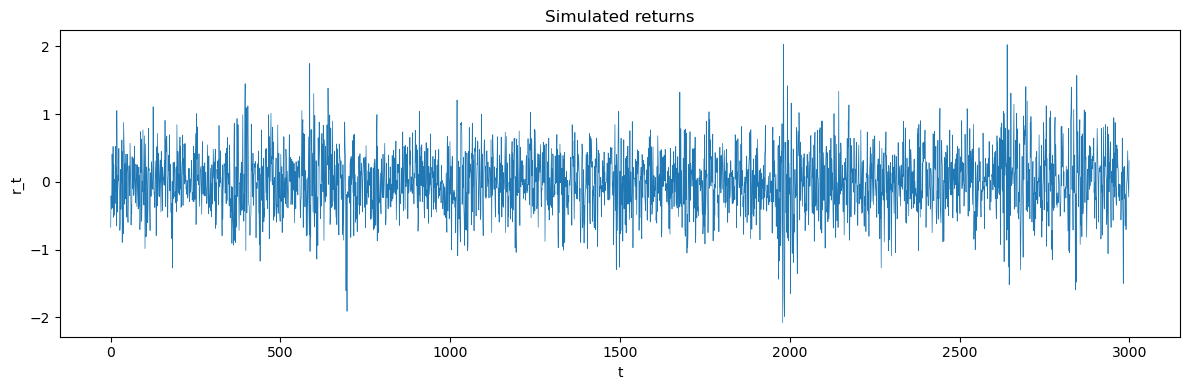

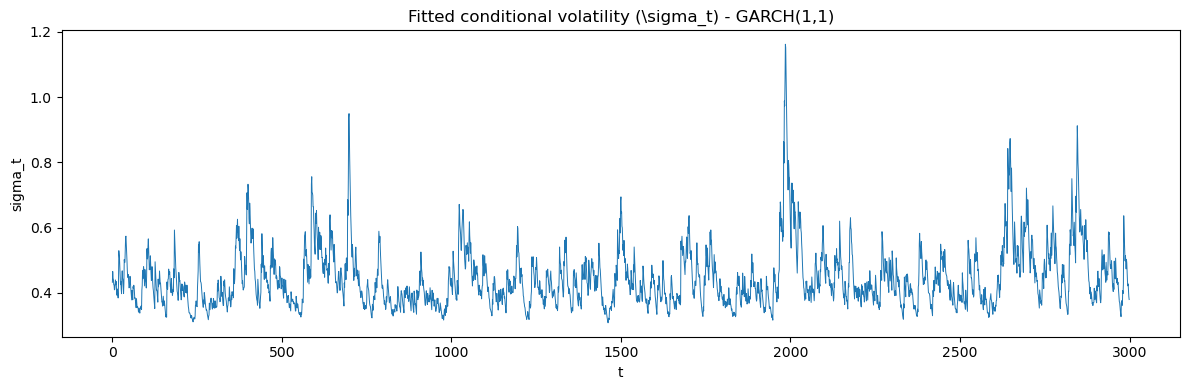

In [ ]:
#################################################
# Optional: plot returns and conditional vol
#################################################
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(returns.values, lw=0.5)
plt.title("Simulated returns")
plt.xlabel("t")
plt.ylabel("r_t")
plt.tight_layout()

plt.figure(figsize=(12,4))
# compute fitted conditional std series from the model
cond_vol = res_final.conditional_volatility
plt.plot(cond_vol, lw=0.7)
plt.title(f"Fitted conditional volatility (sigma_t) - GARCH({final_p},{final_q})")
plt.xlabel("t")
plt.ylabel("sigma_t")
plt.tight_layout()
plt.show()